# TransCanada Phishing State in 2019

## Phishing Report data by Wombat

### User Failure vs Phishing Campaign 


In [2]:
import pandas as pd
pd.__version__

'0.23.4'

In [3]:
# Seaborn visualization library
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# the data set comes from Phishing User Failure Data set
phishing_data = pd.read_csv("data/user_failure_2018.csv",encoding='latin-1')

In [6]:
# what does each row represent?
phishing_data.head()

,First Name,Last Name,Email Address,Last Event Date,Campaign Count,Campaign Failures,Overall Failure Rate,Drive By Campaign Failure Rate,Data Entry Campaign Failure Rate,Attachment Campaign Failure Rate
0,Anoshan,Anharakumaran,a_anharakumaran@transcanada.com,-,7,0,0.00%,0.00%,0.00%,0.00%
1,Alfred,Chandler,a_chandler@transcanada.com,12/27/2018,7,1,14.30%,0.00%,0.00%,100.00%
2,Andria,Christopherson,a_christopherson@transcanada.com,-,4,0,0.00%,0.00%,0.00%,0.00%
3,Amirbahman,Hassanaghaei,a_hassanaghaei@transcanada.com,-,7,0,0.00%,0.00%,0.00%,0.00%
4,Anthony,Heywood-Smith,a_heywood-smith@transcanada.com,11/29/2018,7,1,14.30%,0.00%,0.00%,100.00%


In [7]:
# what is the size of dataset?
phishing_data.shape

(10351, 10)

In [8]:
# convert from percentage to numbers
# user_failed["Overall Failure Rate"].str.rstrip('%').astype('float') / 100.0
phishing_data["Overall Failure Rate"] = phishing_data["Overall Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [9]:
# user_failed["Overall Failure Rate"].str.rstrip('%').astype('float') / 100.0
phishing_data["Drive By Campaign Failure Rate"] = phishing_data["Drive By Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [10]:
phishing_data["Data Entry Campaign Failure Rate"] = phishing_data["Data Entry Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [11]:
phishing_data["Attachment Campaign Failure Rate"] = phishing_data["Attachment Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

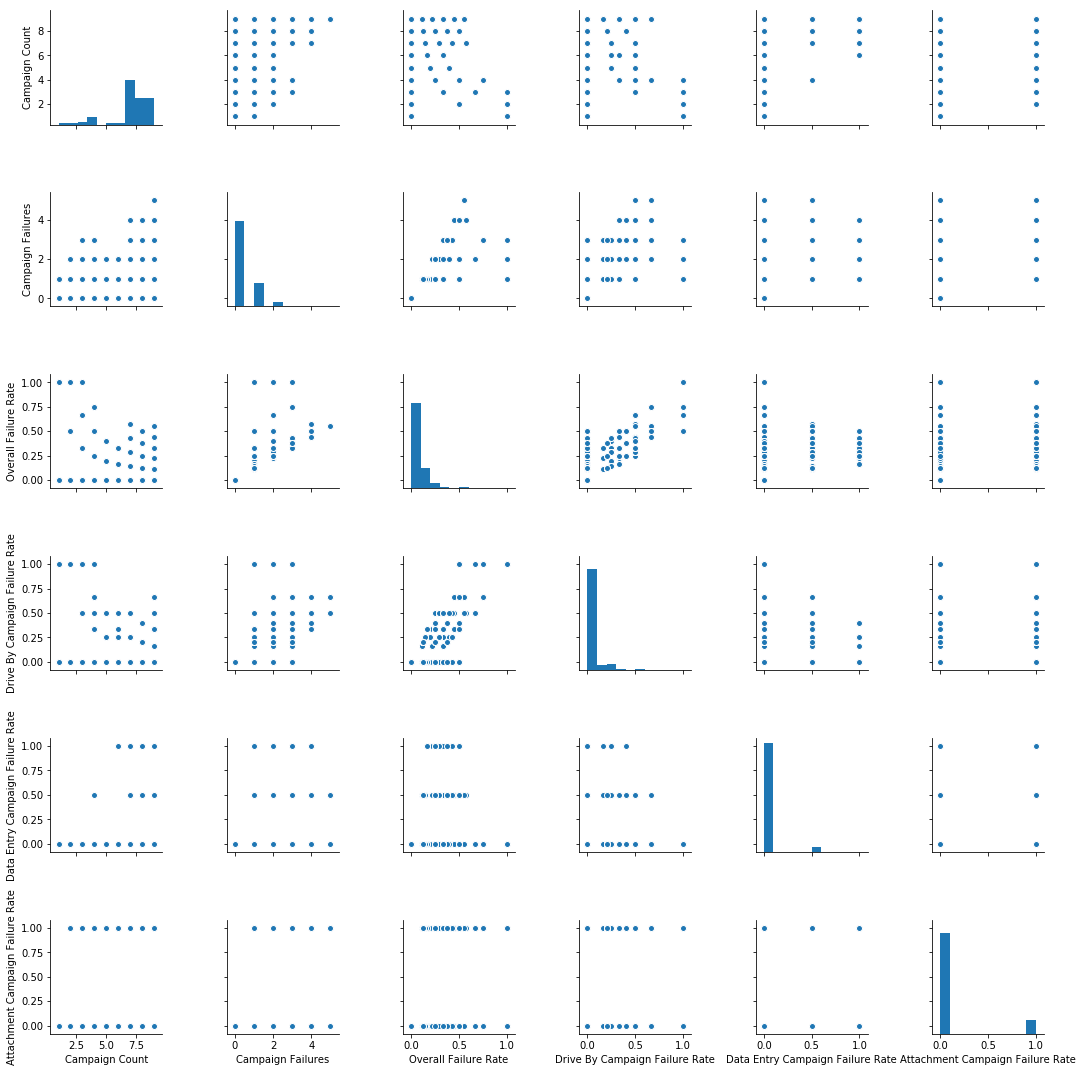

In [13]:
# Create the default pairplot
sns.pairplot(phishing_data)

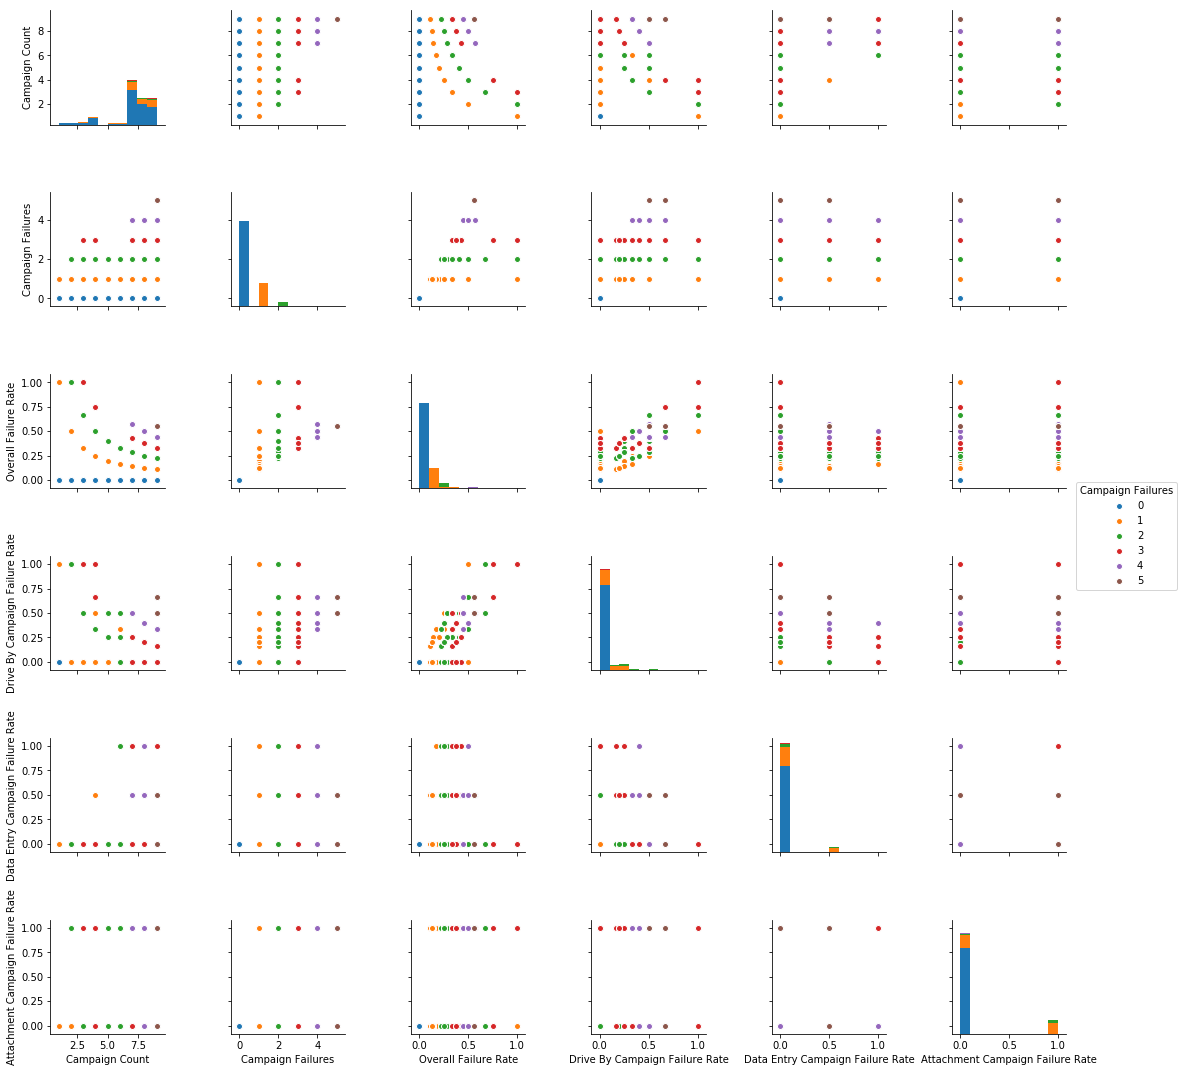

In [18]:
sns.pairplot(phishing_data, hue = 'Campaign Failures')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\ProgramData\Anaconda3\lib\si

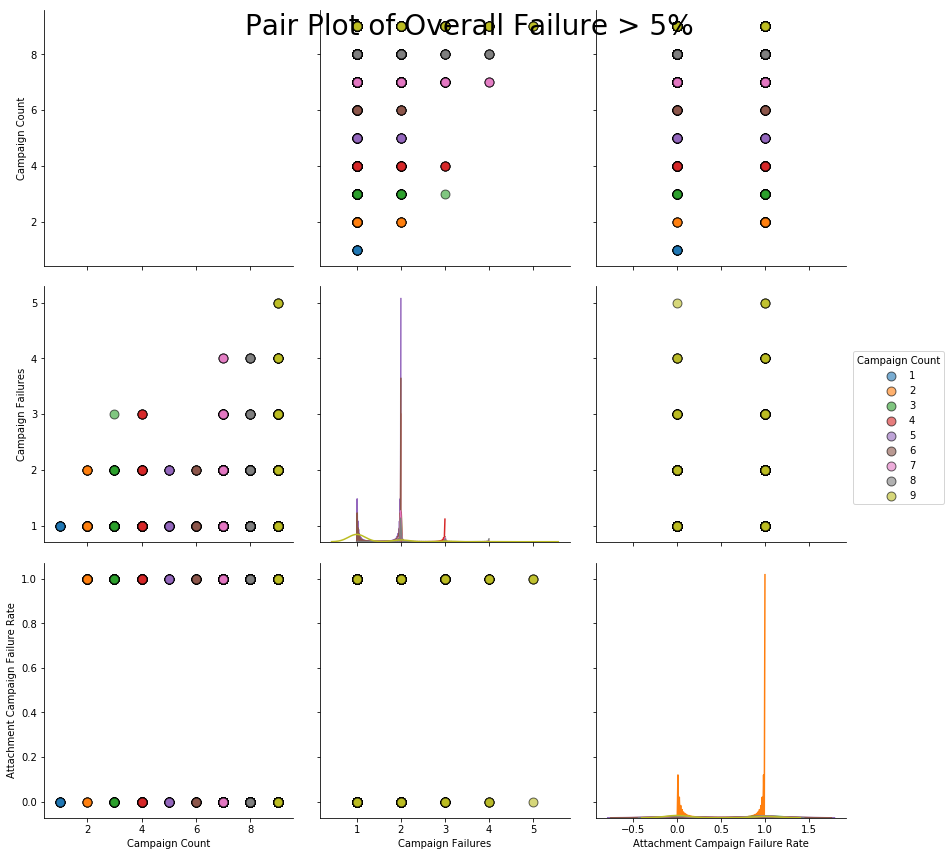

In [21]:
# Plot colored by continent for years 2000-2007
sns.pairplot(phishing_data[phishing_data['Overall Failure Rate'] >= 0.05], 
             vars = ['Campaign Count', 'Campaign Failures', 'Attachment Campaign Failure Rate'], 
             hue = 'Campaign Count', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot of Overall Failure > 5%', 
             size = 28);

In [22]:
# any missing values?
phishing_data.isnull().sum()

First Name                          0
Last Name                           0
Email Address                       0
Last Event Date                     0
Campaign Count                      0
Campaign Failures                   0
Overall Failure Rate                0
Drive By Campaign Failure Rate      0
Data Entry Campaign Failure Rate    0
Attachment Campaign Failure Rate    0
dtype: int64

In [23]:
# what do these numbers mean?
phishing_data["Campaign Failures"].value_counts()

0    7726
1    2107
2     420
3      76
4      18
5       4
Name: Campaign Failures, dtype: int64

In [29]:
# the data set comes from Phishing User Failure Data set
org_chart = pd.read_csv("data/TC_Org_Chart.csv",encoding='latin-1')

In [30]:
# what does each row represen
org_chart.head()

,First name:,Known As Name,Last name:,Name,Mail,Worker Type,Authorized Spending Limit,ASL Start Date,ASL End Date,Active /Inactive,...,Manages Org unit Text,Leader's Position #,Leader's Email,Leader,ELT,Rpt Mgr 1,Rpt Mrg 2,Rpt Mgr 3,Rpt Mgr 4,Rpt Mgr 5
0,Adam,NaN,Moriyama-Bondar,Adam Moriyama-Bondar,adam_bondar@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50088679.0,SIGFRID_SANTIAGO@TRANSCANADA.COM,Sigfrid Santiago,Paul E Miller,Paul E Miller,Norrie Ramsay,Sonya Kirby,Nicole Remillard,Sigfrid Santiago
1,Adrienne,NaN,Watson,Adrienne Watson,adrienne_watson@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90033254.0,TRAN_HUYNH@TRANSCANADA.COM,Tran Huynh,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Shane Healing,James Mausberg,Tran Huynh
2,Amanda,NaN,Sharif,Amanda Sharif,amanda_sharif@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90009713.0,KENT_RAINVILLE@TRANSCANADA.COM,Kent Rainville,Wendy Hanrahan,Wendy Hanrahan,Andrea Jalbert,Kristena Hirak,Kent Rainville,NaN
3,Amy,NaN,Cooper,Amy Cooper,amy_cooper@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50086266.0,GRANT_KUNTZ@TRANSCANADA.COM,Grant Kuntz,Tracy Robinson,Tracy Robinson,VACANT,Stephanie Wilson,Alex Harris,Grant Kuntz
4,Ania,NaN,Mueller,Ania Mueller,ania_mueller@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,Program Management Office,90015822.0,GILLIAN_DAVIES@TRANSCANADA.COM,Gillian Davies,Tracy Robinson,Tracy Robinson,Nancy Johnson,Gillian Davies,NaN,NaN


In [31]:
# what are the dataset size?
org_chart.shape

(11526, 39)

In [32]:
# any null values?
org_chart.isnull().sum()

First name:                      0
Known As Name                10023
Last name:                       0
Name                             0
Mail                          1879
Worker Type                   6858
Authorized Spending Limit     9189
ASL Start Date                9189
ASL End Date                  9189
Active /Inactive                 0
Company Text                     0
Profit Centre                    0
Profit Centre Text               0
Cost Center:                     0
Cost Centre Text                 0
Work Location Code:           1895
Work Location:                1895
Floor #                       6688
Work Location Address         1913
City:                         1909
Province / State:             1899
Postal / Zip code             1897
Country                       1895
Phone:                        4192
Belong to Org Unit #             0
Belong to Org Unit Text          0
Position #:                      0
Employee Role                    0
Manages Org unit #  

In [34]:
# original record was 11526 after removing 1879 records with missing Mail Address
org_chart = org_chart[org_chart.Mail.notnull()]

In [35]:
org_chart

,First name:,Known As Name,Last name:,Name,Mail,Worker Type,Authorized Spending Limit,ASL Start Date,ASL End Date,Active /Inactive,...,Manages Org unit Text,Leader's Position #,Leader's Email,Leader,ELT,Rpt Mgr 1,Rpt Mrg 2,Rpt Mgr 3,Rpt Mgr 4,Rpt Mgr 5
0,Adam,NaN,Moriyama-Bondar,Adam Moriyama-Bondar,adam_bondar@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50088679.0,SIGFRID_SANTIAGO@TRANSCANADA.COM,Sigfrid Santiago,Paul E Miller,Paul E Miller,Norrie Ramsay,Sonya Kirby,Nicole Remillard,Sigfrid Santiago
1,Adrienne,NaN,Watson,Adrienne Watson,adrienne_watson@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90033254.0,TRAN_HUYNH@TRANSCANADA.COM,Tran Huynh,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Shane Healing,James Mausberg,Tran Huynh
2,Amanda,NaN,Sharif,Amanda Sharif,amanda_sharif@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90009713.0,KENT_RAINVILLE@TRANSCANADA.COM,Kent Rainville,Wendy Hanrahan,Wendy Hanrahan,Andrea Jalbert,Kristena Hirak,Kent Rainville,NaN
3,Amy,NaN,Cooper,Amy Cooper,amy_cooper@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50086266.0,GRANT_KUNTZ@TRANSCANADA.COM,Grant Kuntz,Tracy Robinson,Tracy Robinson,VACANT,Stephanie Wilson,Alex Harris,Grant Kuntz
4,Ania,NaN,Mueller,Ania Mueller,ania_mueller@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,Program Management Office,90015822.0,GILLIAN_DAVIES@TRANSCANADA.COM,Gillian Davies,Tracy Robinson,Tracy Robinson,Nancy Johnson,Gillian Davies,NaN,NaN
5,Anjana,Anji,Hardy,Anjana (Anji) Hardy,anji_hardy@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50140477.0,GRADY_SEMMENS@TRANSCANADA.COM,Grady Semmens,Kristine Delkus,Kristine Delkus,Charles Moran,Hejdi Carlsen,Grady Semmens,NaN
6,Anne,NaN,Way,Anne Way,anne_way@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50134658.0,MARK_BLUNDELL@TRANSCANADA.COM,Mark Blundell,Kristine Delkus,Kristine Delkus,Penny Favel,Suzanne Flaman,Mark Blundell,NaN
7,Asya,NaN,Beniaminson,Asya Beniaminson,asya_beniaminson@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90000777.0,BRETT_WAKEHAM@TRANSCANADA.COM,Brett Wakeham,Paul E Miller,Paul E Miller,Norrie Ramsay,Mark Yeomans,David Chittick,Brett Wakeham
8,Aymen,NaN,Rashid,Aymen Rashid,aymen_rashid@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,90027553.0,JENNIFER_KLEMENTIS@TRANSCANADA.COM,Jennifer Klementis,Paul E Miller,Paul E Miller,Norrie Ramsay,Mark Yeomans,Shahani Kariyawasam,Jennifer Klementis
9,Beatriz,NaN,Arias Quero,Beatriz Arias Quero,beatriz_arias_quero@transcanada.com,NaN,NaN,NaN,NaN,1-Inactive,...,NaN,50083807.0,IAN_CHISHOLM@TRANSCANADA.COM,Ian Chisholm,Tracy Robinson,Tracy Robinson,VACANT,Jawad Masud,Nguyen Tran,Ian Chisholm


In [36]:
# the data set comes from Phishing User Failure Data set
AD_users = pd.read_csv("data/TC_AD_Users.csv",encoding='latin-1')

In [37]:
# what are the dataset size?
AD_users.shape

(14696, 8)

In [38]:
# what does each row represen
AD_users.head()

,Name,Mail,enabled,UserID,Department,EmployeeID,Manager,Location
0,Alain Belanger-Ravary,a_belanger-ravary@transcanada.com,False,a_belanger-ravary,NaN,115871.0,Gary Juenke,SpruceGrove
1,Andrew Bellini-Rutledge,a_bellini-rutledge@transcanada.com,False,a_bellini-rutledge,NaN,103200.0,C.J. Barter,Calgary
2,Alexandre Janelle-Goode,a_janelle-goode@transcanada.com,False,a_janelle-goode,NaN,116627.0,Steeve LaFontaine,TorontoRegion
3,Akarsh Sheilendranath,a_sheilendranath@transcanada.com,False,a_sheilendranath,NaN,112226.0,Lauri Newton,Houston
4,Anthony Therrien-Bernard,a_therrien-bernard@transcanada.com,False,a_therrien-bernard,NaN,114671.0,Jon Garry,Calgary


In [39]:
# any null values?
AD_users.isnull().sum()

Name             0
Mail           253
enabled          0
UserID           0
Department    3912
EmployeeID      14
Manager        223
Location       223
dtype: int64

In [40]:
# original record was 14696 after removing 253 records with missing Mail Address = 14443
AD_users = AD_users[AD_users.Mail.notnull()]

In [41]:
AD_users

,Name,Mail,enabled,UserID,Department,EmployeeID,Manager,Location
0,Alain Belanger-Ravary,a_belanger-ravary@transcanada.com,False,a_belanger-ravary,NaN,115871.0,Gary Juenke,SpruceGrove
1,Andrew Bellini-Rutledge,a_bellini-rutledge@transcanada.com,False,a_bellini-rutledge,NaN,103200.0,C.J. Barter,Calgary
2,Alexandre Janelle-Goode,a_janelle-goode@transcanada.com,False,a_janelle-goode,NaN,116627.0,Steeve LaFontaine,TorontoRegion
3,Akarsh Sheilendranath,a_sheilendranath@transcanada.com,False,a_sheilendranath,NaN,112226.0,Lauri Newton,Houston
4,Anthony Therrien-Bernard,a_therrien-bernard@transcanada.com,False,a_therrien-bernard,NaN,114671.0,Jon Garry,Calgary
5,Aahil Dawoodani,aahil_dawoodani@transcanada.com,False,aahil_dawoodani,NaN,116190.0,Zahra D Khimji,Calgary
6,Aaron Aultman,aaron_aultman@transcanada.com,False,aaron_aultman,NaN,106914.0,Scott Nugent,Houston
7,Aaron Barna,aaron_barna@transcanada.com,False,aaron_barna,NaN,108643.0,Jason Lopez,Transitional
8,Aaron Blackmer,aaron_blackmer@transcanada.com,False,aaron_blackmer,NaN,104391.0,Kevin Nichiporik,Field
9,Aaron Cortes,aaron_cortes@transcanada.com,False,aaron_cortes,NaN,105628.0,Hector Soberano De la Rosa,Mexico


In [42]:
AD_users.enabled.value_counts()

True     10368
False     4075
Name: enabled, dtype: int64

# this section is for OrgChart with Department

In [61]:
# Combine Phishing data 
user_failed = pd.merge(phishing_data,org_chart,left_on='Email Address', right_on='Mail', how='left')

In [62]:
user_failed.columns

Index(['First Name', 'Last Name', 'Email Address', 'Last Event Date',
       'Campaign Count', 'Campaign Failures', 'Overall Failure Rate',
       'Drive By Campaign Failure Rate', 'Data Entry Campaign Failure Rate',
       'Attachment Campaign Failure Rate', 'First name:', 'Known As Name',
       'Last name:', 'Name', 'Mail', 'Worker Type',
       'Authorized Spending Limit', 'ASL Start Date', 'ASL End Date',
       'Active /Inactive', 'Company Text', 'Profit Centre',
       'Profit Centre Text', 'Cost Center:', 'Cost Centre Text',
       'Work Location Code:', 'Work Location:', 'Floor #',
       'Work Location Address', 'City:', 'Province / State:',
       'Postal / Zip code', 'Country', 'Phone:', 'Belong to Org Unit #',
       'Belong to Org Unit Text', 'Position #:', 'Employee Role',
       'Manages Org unit #', 'Manages Org unit Text', 'Leader's Position #',
       'Leader's Email', 'Leader', 'ELT', 'Rpt Mgr 1', 'Rpt Mrg 2',
       'Rpt Mgr 3', 'Rpt Mgr 4', 'Rpt Mgr 5'],
      dty

In [63]:
user_failed.shape

(10351, 49)

In [64]:
user_failed = user_failed.drop(columns= ["First name:", "Known As Name", "Last name:", "Mail"], axis=1)

In [65]:
# what are each columns and types?
user_failed.dtypes

First Name                           object
Last Name                            object
Email Address                        object
Last Event Date                      object
Campaign Count                        int64
Campaign Failures                     int64
Overall Failure Rate                 object
Drive By Campaign Failure Rate       object
Data Entry Campaign Failure Rate     object
Attachment Campaign Failure Rate     object
Name                                 object
Worker Type                          object
Authorized Spending Limit            object
ASL Start Date                       object
ASL End Date                         object
Active /Inactive                     object
Company Text                         object
Profit Centre                       float64
Profit Centre Text                   object
Cost Center:                        float64
Cost Centre Text                     object
Work Location Code:                  object
Work Location:                  

In [66]:
user_failed.shape

(10351, 45)

In [67]:
user_failed.isnull().sum()

First Name                             0
Last Name                              0
Email Address                          0
Last Event Date                        0
Campaign Count                         0
Campaign Failures                      0
Overall Failure Rate                   0
Drive By Campaign Failure Rate         0
Data Entry Campaign Failure Rate       0
Attachment Campaign Failure Rate       0
Name                                1300
Worker Type                         7919
Authorized Spending Limit           8046
ASL Start Date                      8046
ASL End Date                        8046
Active /Inactive                    1300
Company Text                        1300
Profit Centre                       1300
Profit Centre Text                  1300
Cost Center:                        1300
Cost Centre Text                    1300
Work Location Code:                 1805
Work Location:                      1805
Floor #                             5823
Work Location Ad

In [93]:
# after you join Phsing Data with Organization Chart
# we discover that there are 1300 recores with missing eMail address
user_failed[(user_failed.Name.isnull())].to_csv (r'C:\DEV\Jupyter\data\export_orgchart_missing_Mail.csv', index = None, header=True)

In [94]:
user_failed = user_failed[(user_failed.Name.notnull())]

In [95]:
user_failed.shape

(9051, 45)

In [96]:
user_failed['Cost Centre Text'].value_counts()

Gas Proj Project MX     249
Construction Mgmt       149
USNG Safety & Qual      145
KXL Facilities US        91
KXL CAD Dev Project      89
USNG GPMC West           87
Gas Proj Engineering     84
USNG GPMC East Mod       80
PI Constructn Mgmt       77
NSIT CORE NET SRV CA     63
USNG Gas Control W       62
USNG Gas Contrl East     62
USNG Con Serv West       60
IS EITS                  58
USNG Growth & Devel      57
Facilities Ser Clgry     57
Energy Napanee           54
CGL Project Services     53
CPO CentralCorrosion     52
USTS Mntce Prog&Plan     51
USNG Nominat&Schedul     50
ISBO BUS GOV OFF         48
USNG Proj Tech Srv       45
EOA1: Bus Ops            44
USTS Measure Serv        42
Liq System Control       42
USTS Drafting Svcs       41
RTS & SCADA Eng          38
USNG Con Serv East       38
ELIR ENV GAS PROJECT     37
                       ... 
USNG XP Proj Clse CA      1
ISBO RICOH US             1
DTO AUT INV  DVRY US      1
USNGOps Wst Exec Mgt      1
MGO Toluca Reg Offic

In [97]:
user_failed['Rpt Mgr 1'].value_counts()

Stanley Chapman III    2751
Tracy Robinson         2053
Wendy Hanrahan         1449
Paul E Miller          1178
Francois Poirier        672
Kristine Delkus         601
Donald Marchand         338
Name: Rpt Mgr 1, dtype: int64

In [98]:
# what do these types mean?
user_failed.groupby('Cost Centre Text')["Campaign Failures"].mean()

Cost Centre Text
AB Energy OP FO         0.250000
Acctg Bus Support       0.111111
Acctg Serv MX           0.785714
Aviation Patrol         0.800000
BL Area-ANRP            0.633333
BL Ops-GLGT People      0.285714
BU Communications       2.000000
BUIT CA & IS Stratgy    0.000000
BUIT CA GAS PIPE SYS    0.222222
BUIT ENERGY CA          0.333333
BUIT LIQUIDS PIPE       0.000000
BUIT MX IT SERVICES     0.384615
BUIT PROJ DEL US        0.200000
BUIT Proj Del CA        0.171429
BUIT Proj Del Com CA    0.214286
BUIT SCADA EAST         0.166667
BUIT SCADA WEST         0.277778
BUIT USNG EAST          0.272727
BUIT USNG SHARED        0.000000
BUIT USNG WEST          0.280000
BWR Rgn Mgmt -People    0.800000
BWR-North People        0.392857
BWR-South People        0.500000
Badger Area-ANRP        0.433333
Becancour               0.250000
Business Planning       0.058824
CA Commodity Tax        0.500000
CA Gas Commercial       1.000000
CA Imp Gas Facilitie    1.000000
CA InternalAudit&SOX    0.

# This section is for User Active/Inactive with AD

In [124]:
# Combine Phishing data 
user_inactive = pd.merge(phishing_data,AD_users, left_on="Email Address", right_on="Mail", how='left')

In [125]:
user_inactive.shape

(10351, 18)

In [126]:
user_inactive.dtypes

First Name                           object
Last Name                            object
Email Address                        object
Last Event Date                      object
Campaign Count                        int64
Campaign Failures                     int64
Overall Failure Rate                 object
Drive By Campaign Failure Rate       object
Data Entry Campaign Failure Rate     object
Attachment Campaign Failure Rate     object
Name                                 object
Mail                                 object
enabled                              object
UserID                               object
Department                           object
EmployeeID                          float64
Manager                              object
Location                             object
dtype: object

In [127]:
user_inactive = user_inactive.drop(columns="Mail", axis=1)

In [128]:
user_inactive.isnull().sum()

First Name                             0
Last Name                              0
Email Address                          0
Last Event Date                        0
Campaign Count                         0
Campaign Failures                      0
Overall Failure Rate                   0
Drive By Campaign Failure Rate         0
Data Entry Campaign Failure Rate       0
Attachment Campaign Failure Rate       0
Name                                 954
enabled                              954
UserID                               954
Department                          1049
EmployeeID                           960
Manager                              971
Location                             971
dtype: int64

In [129]:
user_inactive[(user_inactive.Name.isnull())].to_csv (r'C:\DEV\Jupyter\data\export_AD_missing_Mail.csv', index = None,header=True)

In [130]:
user_inactive = user_inactive[(user_inactive.Name.notnull())]

In [131]:
user_inactive.shape

(9397, 17)

In [135]:
user_inactive.enabled.value_counts()

True     9365
False      32
Name: enabled, dtype: int64

In [136]:
consolidated_user_failed = pd.merge(user_inactive,user_failed,  how='inner')

In [137]:
consolidated_user_failed.enabled.value_counts()

True     6820
False      27
Name: enabled, dtype: int64

In [138]:
consolidated_user_failed.isnull().sum()

First Name                             0
Last Name                              0
Email Address                          0
Last Event Date                        0
Campaign Count                         0
Campaign Failures                      0
Overall Failure Rate                   0
Drive By Campaign Failure Rate         0
Data Entry Campaign Failure Rate       0
Attachment Campaign Failure Rate       0
Name                                   0
enabled                                0
UserID                                 0
Department                            29
EmployeeID                             2
Manager                                6
Location                               6
Worker Type                         4692
Authorized Spending Limit           5316
ASL Start Date                      5316
ASL End Date                        5316
Active /Inactive                       0
Company Text                           0
Profit Centre                          0
Profit Centre Te

In [139]:
consolidated_user_failed.shape

(6847, 51)

In [140]:
consolidated_user_failed.dtypes

First Name                           object
Last Name                            object
Email Address                        object
Last Event Date                      object
Campaign Count                        int64
Campaign Failures                     int64
Overall Failure Rate                 object
Drive By Campaign Failure Rate       object
Data Entry Campaign Failure Rate     object
Attachment Campaign Failure Rate     object
Name                                 object
enabled                              object
UserID                               object
Department                           object
EmployeeID                          float64
Manager                              object
Location                             object
Worker Type                          object
Authorized Spending Limit            object
ASL Start Date                       object
ASL End Date                         object
Active /Inactive                     object
Company Text                    

In [141]:
consolidated_user_failed.to_csv(r'C:\DEV\Jupyter\data\export_consolidated_user_failures.csv', index = None, header=True)

# This section is for Plotting with data

In [142]:
consolidated_user_failed[consolidated_user_failed.enabled == False]

,First Name,Last Name,Email Address,Last Event Date,Campaign Count,Campaign Failures,Overall Failure Rate,Drive By Campaign Failure Rate,Data Entry Campaign Failure Rate,Attachment Campaign Failure Rate,...,Manages Org unit Text,Leader's Position #,Leader's Email,Leader,ELT,Rpt Mgr 1,Rpt Mrg 2,Rpt Mgr 3,Rpt Mgr 4,Rpt Mgr 5
172,Alex,Shaw,alex_shaw@transcanada.com,10/31/2018,7,0,0.00%,0.00%,0.00%,0.00%,...,NaN,90003375.0,BRIAN_YOUNG@TRANSCANADA.COM,Brian Young,Tracy Robinson,Tracy Robinson,John Soini,Doug Harvey,Kevin Rookes,NaN
648,Brad,McVey,brad_mcvey@transcanada.com,12/26/2018,7,1,14.30%,0.00%,0.00%,100.00%,...,NaN,90028217.0,MARIA_EISENBERG@TRANSCANADA.COM,Maria Eisenberg,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Edwin Bickley,Maria Eisenberg,NaN
1571,Darren,McBurney,darren_mcburney@transcanada.com,12/26/2018,7,0,0.00%,0.00%,0.00%,0.00%,...,NaN,90033384.0,CARLING_MORIN@TRANSCANADA.COM,Carling Morin,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Shane Healing,James Mausberg,Carling Morin
1664,David,Nguyen,david_nguyen@transcanada.com,-,7,0,0.00%,0.00%,0.00%,0.00%,...,NaN,50103682.0,NADA_SIDDIK@TRANSCANADA.COM,Nada Siddik,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Alan Burns,Stephen Black,Nada Siddik
2246,Gary,Yee,gary_yee@transcanada.com,1/2/2019,7,1,14.30%,0.00%,0.00%,100.00%,...,NaN,90033229.0,MAHMOUD_HAMED@TRANSCANADA.COM,Mahmoud Hamed,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Shane Healing,Carrie O'Hara,Mahmoud Hamed
2299,Gerry,Vogt,gerry_vogt@transcanada.com,-,9,0,0.00%,0.00%,0.00%,0.00%,...,NaN,90028217.0,MARIA_EISENBERG@TRANSCANADA.COM,Maria Eisenberg,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Edwin Bickley,Maria Eisenberg,NaN
2387,Gregory,Bromby,gregory_bromby@transcanada.com,11/1/2018,9,1,11.10%,16.70%,0.00%,0.00%,...,NaN,50093529.0,LORI_ROBERTSON@TRANSCANADA.COM,Lori Robertson,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Raylene Charron,Lori Robertson,NaN
3122,Joe,McHendry,joe_mchendry@transcanada.com,-,2,0,0.00%,0.00%,0.00%,0.00%,...,NaN,90030370.0,MOYA_QUINONES@TRANSCANADA.COM,Moya Quinones,Paul E Miller,Paul E Miller,Norrie Ramsay,Jason Hamil,Ronnie Garrett,Moya Quinones
3214,John,Milsom,john_milsom@transcanada.com,11/30/2018,7,1,14.30%,0.00%,0.00%,100.00%,...,NaN,90031682.0,PAT_DRYSDALE@TRANSCANADA.COM,Patrick Drysdale,Tracy Robinson,Tracy Robinson,Terri Steeves,William Small,Patrick Drysdale,NaN
3678,Kendra,Kruger,kendra_kruger@transcanada.com,11/29/2018,9,0,0.00%,0.00%,0.00%,0.00%,...,NaN,90033229.0,MAHMOUD_HAMED@TRANSCANADA.COM,Mahmoud Hamed,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Shane Healing,Carrie O'Hara,Mahmoud Hamed


# Merge user_failed with OrgChart and AD

##  there are total of 5661 user failures

### which including 818 Inactive Users and 307 orphan Users 

## Start with Histogram graph

### Campaigen Failuures with Number of Users

Text(0, 0.5, 'Number of Users')

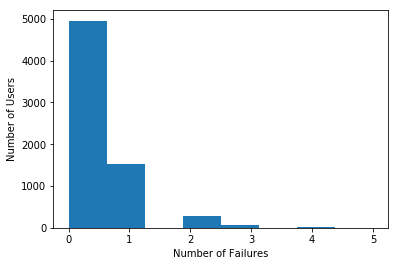

In [144]:
# try more bins
consolidated_user_failed["Campaign Failures"].plot(kind='hist', bins=8)
plt.xlabel('Number of Failures')
plt.ylabel('Number of Users')

In [146]:
# convert from percentage to numbers
# user_failed["Overall Failure Rate"].str.rstrip('%').astype('float') / 100.0
consolidated_user_failed["Overall Failure Rate"] = consolidated_user_failed["Overall Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [147]:
consolidated_user_failed["Drive By Campaign Failure Rate"] = consolidated_user_failed["Drive By Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0


In [148]:
consolidated_user_failed["Data Entry Campaign Failure Rate"] = consolidated_user_failed["Data Entry Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0


In [149]:

consolidated_user_failed["Attachment Campaign Failure Rate"] = consolidated_user_failed["Attachment Campaign Failure Rate"].astype('str').str.rstrip('%').astype('float') / 100.0

In [150]:
consolidated_user_failed["enabled"]= consolidated_user_failed["enabled"].astype('bool')

In [151]:
# what do these types mean?
consolidated_user_failed.dtypes

First Name                           object
Last Name                            object
Email Address                        object
Last Event Date                      object
Campaign Count                        int64
Campaign Failures                     int64
Overall Failure Rate                float64
Drive By Campaign Failure Rate      float64
Data Entry Campaign Failure Rate    float64
Attachment Campaign Failure Rate    float64
Name                                 object
enabled                                bool
UserID                               object
Department                           object
EmployeeID                          float64
Manager                              object
Location                             object
Worker Type                          object
Authorized Spending Limit            object
ASL Start Date                       object
ASL End Date                         object
Active /Inactive                     object
Company Text                    

In [153]:
# what does row like after conversion?
consolidated_user_failed.head()

,First Name,Last Name,Email Address,Last Event Date,Campaign Count,Campaign Failures,Overall Failure Rate,Drive By Campaign Failure Rate,Data Entry Campaign Failure Rate,Attachment Campaign Failure Rate,...,Manages Org unit Text,Leader's Position #,Leader's Email,Leader,ELT,Rpt Mgr 1,Rpt Mrg 2,Rpt Mgr 3,Rpt Mgr 4,Rpt Mgr 5
0,Anoshan,Anharakumaran,a_anharakumaran@transcanada.com,-,7,0,0.000,0.0,0.0,0.0,...,NaN,50140023.0,KIRSTY_SAKIRES@TRANSCANADA.COM,Kirsty Sakires,Wendy Hanrahan,Wendy Hanrahan,Christopher Foster,Edwin Bickley,Kirsty Sakires,NaN
1,Amirbahman,Hassanaghaei,a_hassanaghaei@transcanada.com,-,7,0,0.000,0.0,0.0,0.0,...,NaN,50104998.0,CATHY_GOUGH@TRANSCANADA.COM,Cathryn Gough,Paul E Miller,Paul E Miller,VACANT,David Diakow,Kevin Engel,Cathryn Gough
2,Anthony,Heywood-Smith,a_heywood-smith@transcanada.com,11/29/2018,7,1,0.143,0.0,0.0,1.0,...,NaN,90008399.0,RYAN_JOLLY@TRANSCANADA.COM,Ryan Jolly,Tracy Robinson,Tracy Robinson,Terri Steeves,Kyle Keith,Ryan Jolly,NaN
3,Ana Gabriela,Olmeda de Alejandro,a_olmeda_dealejandro@transcanada.com,10/31/2018,7,0,0.000,0.0,0.0,0.0,...,Mexico Law,90009609.0,CATHARINE_DAVIS@TRANSCANADA.COM,Mary Catharine Davis,Kristine Delkus,Kristine Delkus,Patrick Keys,Mary Catharine Davis,NaN,NaN
4,Annethe,Rodriguez Lomeli,a_rodriguez_lomeli@transcanada.com,11/29/2018,4,1,0.250,0.0,0.0,1.0,...,NaN,50128129.0,JOHN_CAMERON@TRANSCANADA.COM,John Cameron,Kristine Delkus,Kristine Delkus,Patrick Keys,Dave Kohlenberg,John Cameron,NaN


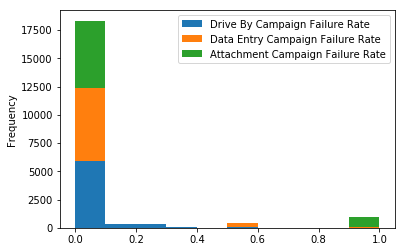

In [155]:
# stacked histogram with multiple variables
consolidated_user_failed[['Drive By Campaign Failure Rate', 'Data Entry Campaign Failure Rate', 'Attachment Campaign Failure Rate']].plot(kind='hist', stacked=True)

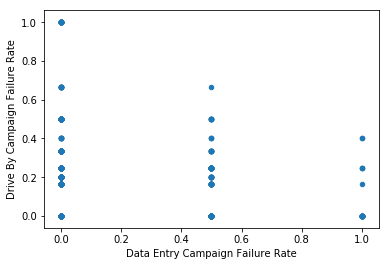

In [156]:
# compare with scatter plot
consolidated_user_failed.plot(kind='scatter', x='Data Entry Campaign Failure Rate', y='Drive By Campaign Failure Rate')

In [157]:
# The function will count all observations, regardless if there are missing or null values.
length = len(consolidated_user_failed["Cost Centre Text"])
print(length)

# Count
# The count function will return the number of non-NA/non-null observations in a Series.

count = consolidated_user_failed["Cost Centre Text"].count()
print(count)

# Percentage of missing Values
number_of_missing_values = length - count
pct_of_missing_values = float(number_of_missing_values / length)
pct_of_missing_values = "{0:.1f}%".format(pct_of_missing_values*100)
print(pct_of_missing_values)

# Minimum/Maximum Value
# The minimum and maximum value of a dataset can easily be obtained with the min and maxfunction on a Series.
print("Minimum value: ", consolidated_user_failed["Overall Failure Rate"].min())
print("Maximum value: ", consolidated_user_failed["Overall Failure Rate"].max())

# It can be obtained with the mean function on a Series.
mean = consolidated_user_failed["Overall Failure Rate"].mean()
standarddev = consolidated_user_failed["Overall Failure Rate"].std()
print ("mean value:", mean)
print ("standard deviation:", standarddev)

6847
6847
0.0%
Minimum value:  0.0
Maximum value:  1.0
mean value: 0.05287264495399379
standard deviation: 0.10881615029112952


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


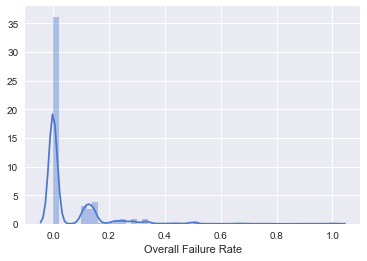

In [158]:
# To create this visualization, 
# we are using the seaborn`` library with thedisplotfunction. 
# This function expects aSeries` with no missing values.

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))
sns.distplot(consolidated_user_failed["Overall Failure Rate"].dropna());


In [160]:
consolidated_user_failed[["Cost Centre Text", "Overall Failure Rate"]].describe

<bound method NDFrame.describe of           Cost Centre Text  Overall Failure Rate
0         ISBO BUS GOV OFF                 0.000
1     Liq Volumetric Acctg                 0.000
2     Gas Proj Saddle West                 0.143
3        Legal Services MX                 0.000
4     Liquids Com & CA Reg                 0.250
5     CGO Measuremt Eng CA                 0.000
6         BUIT PROJ DEL US                 0.000
7           US Midstrm Ops                 0.000
8      Houston Inc Tax Gas                 0.143
9       USTS Compress East                 0.000
10        Flint Hills-ANRP                 0.000
11     Gas Proj Project MX                 0.000
12          NEOA6: Bus Ops                 0.000
13              SCUO MX AP                 0.000
14         BUIT SCADA WEST                 0.000
15          SEOA6: Bus Ops                 0.000
16      USNG Safety & Qual                 0.000
17        Gas Proj PL Proj                 0.000
18      Corporate Treasury         

In [165]:
consolidated_user_failed.groupby('Cost Centre Text')["Overall Failure Rate", "Campaign Failures"].mean()

,Overall Failure Rate,Campaign Failures
Cost Centre Text,,
AB Energy OP FO,0.033500,0.250000
Acctg Bus Support,0.000000,0.000000
Acctg Serv MX,0.071500,0.500000
Aviation Patrol,0.206333,1.000000
BL Area-ANRP,0.063882,0.470588
BL Ops-GLGT People,0.039333,0.333333
BU Communications,0.250000,2.000000
BUIT CA & IS Stratgy,0.000000,0.000000
BUIT CA GAS PIPE SYS,0.023133,0.200000


In [167]:
consolidated_user_failed.groupby('Location')["Overall Failure Rate"].agg(['min', 'max'])

,min,max
Location,,
Calgary,0.0,1.000
CentralCanada,0.0,0.667
Field,0.0,0.556
HaltonHills,0.0,0.500
Houston,0.0,1.000
Mexico,0.0,0.750
NorthernOntario,0.0,0.250
Omaha,0.0,1.000
Portland,0.0,0.167


In [168]:
consolidated_user_failed.groupby('ELT')["Overall Failure Rate"].agg(['min', 'max'])
consolidated_user_failed.groupby('ELT')["Overall Failure Rate"].mean()
consolidated_user_failed.groupby('ELT')["Overall Failure Rate"].count()

ELT
Donald Marchand         235
Francois Poirier        463
Kristine Delkus         479
Paul E Miller           908
Russ Girling              6
Stanley Chapman III    1980
Tracy Robinson         1627
Wendy Hanrahan         1148
Name: Overall Failure Rate, dtype: int64

In [169]:
consolidated_user_failed.groupby(['ELT', 'Cost Centre Text'])["Overall Failure Rate"].agg(['min', 'max'])
consolidated_user_failed.groupby(['ELT', 'Cost Centre Text'])["Overall Failure Rate"].mean()
consolidated_user_failed.groupby(['ELT', 'Cost Centre Text'])["Overall Failure Rate"].count()

ELT              Cost Centre Text    
Donald Marchand  Acctg Bus Support        6
                 Acctg Serv MX            2
                 CA Commodity Tax         4
                 CA Pipeline Acctg E      4
                 CA Pipeline Acctg W      3
                 Calgary CDN Taxation    10
                 Calgary US Taxation      3
                 Contract Risk            5
                 Controller               2
                 Corp Evaluations         7
                 Corp Finance&Pension     2
                 Corp Plan & Eval         3
                 Corporate Accounting     7
                 Corporate Finance        2
                 Corporate Treasury      11
                 Cost Management          1
                 Counterparty Risk        2
                 Counterparty Rptng       1
                 Ctrparty Risk Mgmt       7
                 Energy Acctg West        5
                 Energy-Fncl Services     2
                 Executive Leadership 

In [171]:
consolidated_user_failed.groupby(['Rpt Mrg 2', 'Cost Centre Text'])["Overall Failure Rate"].agg(['min', 'max'])
consolidated_user_failed.groupby(['Rpt Mrg 2', 'Cost Centre Text'])["Overall Failure Rate"].mean()

Rpt Mrg 2            Cost Centre Text    
Alexandra Federucci  HR BU Consulting US     0.057200
                     HR Compensation         0.031714
                     HR Compliance & Prog    0.027750
                     HR Consult CdnGas       0.153600
                     HR Consulting Corp      0.081900
                     HR Employe Center CA    0.082833
                     HR Global Mobility      0.000000
                     HR MX                   0.111000
                     HR Master Data Mgmt     0.000000
                     HR Payroll and Ops      0.071125
                     HR Pension&Benefits     0.000000
                     HR People Management    0.095333
                     HR Shared Serv US       0.071500
                     HR Talent Acq CA        0.106000
                     HR Talent Acq US        0.023833
                     HR Talent Programs      0.083333
                     US Rewards & HR Serv    0.128600
Andrea Jalbert       MM Head Office     

In [170]:
consolidated_user_failed.pivot_table('Campaign Failures', index='Cost Centre Text', columns=['ELT'])

ELT,Donald Marchand,Francois Poirier,Kristine Delkus,Paul E Miller,Russ Girling,Stanley Chapman III,Tracy Robinson,Wendy Hanrahan
Cost Centre Text,,,,,,,,
AB Energy OP FO,NaN,0.25,NaN,NaN,NaN,NaN,NaN,NaN
Acctg Bus Support,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Acctg Serv MX,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aviation Patrol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
BL Area-ANRP,NaN,NaN,NaN,NaN,NaN,0.470588,NaN,NaN
BL Ops-GLGT People,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,NaN
BU Communications,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
BUIT CA & IS Stratgy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
BUIT CA GAS PIPE SYS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200000


- What does NaN mean?
- Why might a value be missing?
- Why mark it as NaN? Why not mark it as a 0 or an empty string or a string saying "Unknown"?

In [173]:
# what are these counts? how does this work?
consolidated_user_failed.isnull().sum()

First Name                             0
Last Name                              0
Email Address                          0
Last Event Date                        0
Campaign Count                         0
Campaign Failures                      0
Overall Failure Rate                   0
Drive By Campaign Failure Rate         0
Data Entry Campaign Failure Rate       0
Attachment Campaign Failure Rate       0
Name                                   0
enabled                                0
UserID                                 0
Department                            29
EmployeeID                             2
Manager                                6
Location                               6
Worker Type                         4692
Authorized Spending Limit           5316
ASL Start Date                      5316
ASL End Date                        5316
Active /Inactive                       0
Company Text                           0
Profit Centre                          0
Profit Centre Te

In [174]:
(True == 1) and (False == 0)

True

In [175]:
import os
from IPython.display import Image, display, HTML

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [176]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [185]:
@interact
def describe(column=list(consolidated_user_failed.columns)):
    print(consolidated_user_failed[column].describe())

interactive(children=(Dropdown(description='column', options=('First Name', 'Last Name', 'Email Address', 'Las…

In [184]:
@interact
def show_articles_more_than(column='Campaign Failures', x=3):
    display(HTML(f'<h2>user Failed with more than {x} {column}<h2>'))
    display(consolidated_user_failed.loc[consolidated_user_failed[column] > x, ['Email Address', 'Cost Centre Text', 'ELT', 'Location']])

interactive(children=(Text(value='Campaign Failures', description='column'), IntSlider(value=3, description='x…

In [179]:
@interact
def scatter_plot(x=list(consolidated_user_failed.select_dtypes('number').columns), 
                 y=list(consolidated_user_failed.select_dtypes('number').columns)[1:]):
    consolidated_user_failed.iplot(kind='scatter', x=x, y=y, mode='markers', 
             xTitle=x.title(), yTitle=y.title(), title=f'{y.title()} vs {x.title()}')

interactive(children=(Dropdown(description='x', options=('Campaign Count', 'Campaign Failures', 'Overall Failu…

In [180]:
@interact
def scatter_plot(x=list(consolidated_user_failed.select_dtypes('number').columns), 
                 y=list(consolidated_user_failed.select_dtypes('number').columns)[1:],
                 categories=['Rpt Mgr 1', 'Rpt Mgr 2', 'Rprt Mgr 3'],
                 theme=list(cf.themes.THEMES.keys()), 
                 colorscale=list(cf.colors._scales_names.keys())):
    
    user_failed.iplot(kind='scatter', x=x, y=y, mode='markers', 
             categories=categories, 
             xTitle=x.title(), yTitle=y.title(), 
#             text='title',
             title=f'{y.title()} vs {x.title()}',
             theme=theme, colorscale=colorscale)

interactive(children=(Dropdown(description='x', options=('Campaign Count', 'Campaign Failures', 'Overall Failu…

# Plot Graph
## Line Chart

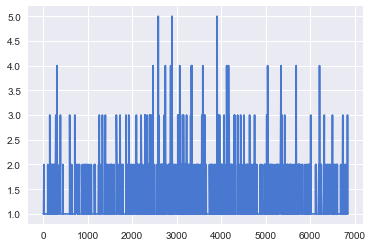

In [182]:
filteredData = consolidated_user_failed[consolidated_user_failed["Campaign Failures"] > 0]
filteredData["Campaign Failures"].plot()


# VERTICAL BAR GRAPH

,First Name,Last Name,Email Address,Last Event Date,Campaign Count,Campaign Failures,Overall Failure Rate,Drive By Campaign Failure Rate,Data Entry Campaign Failure Rate,Attachment Campaign Failure Rate,...,Manages Org unit Text,Leader's Position #,Leader's Email,Leader,ELT,Rpt Mgr 1,Rpt Mrg 2,Rpt Mgr 3,Rpt Mgr 4,Rpt Mgr 5
2,Anthony,Heywood-Smith,a_heywood-smith@transcanada.com,11/29/2018,7,1,0.143,0.00,0.0,1.0,...,NaN,90008399.0,RYAN_JOLLY@TRANSCANADA.COM,Ryan Jolly,Tracy Robinson,Tracy Robinson,Terri Steeves,Kyle Keith,Ryan Jolly,NaN
4,Annethe,Rodriguez Lomeli,a_rodriguez_lomeli@transcanada.com,11/29/2018,4,1,0.250,0.00,0.0,1.0,...,NaN,50128129.0,JOHN_CAMERON@TRANSCANADA.COM,John Cameron,Kristine Delkus,Kristine Delkus,Patrick Keys,Dave Kohlenberg,John Cameron,NaN
8,Aaron,Carnell,aaron_carnell@transcanada.com,11/29/2018,7,1,0.143,0.00,0.0,1.0,...,NaN,50131658.0,JOANNE_LEE@TRANSCANADA.COM,Joanne Lee,Donald Marchand,Donald Marchand,Dennis Hebert,Nancy Priemer,Joanne Lee,NaN
18,Aaron,Lam,aaron_lam@transcanada.com,12/4/2018,7,2,0.286,0.00,0.5,1.0,...,NaN,50098017.0,LAVENDER_EARLY@TRANSCANADA.COM,Lavender Early,Donald Marchand,Donald Marchand,Joel Hunter,Ian Hendy,Yvonne Frame-Zawalykut,Lora Manning
19,Aaron,Lamson,aaron_lamson@transcanada.com,12/26/2018,7,1,0.143,0.25,0.0,0.0,...,NaN,50084878.0,KELLY_DUENAS@TRANSCANADA.COM,Kelly Duenas,Tracy Robinson,Tracy Robinson,John Soini,Agustin Barrenechea,Kelly Duenas,NaN


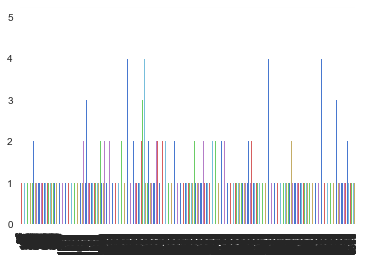

In [183]:
filteredData.head()
filteredData["Campaign Failures"].plot(kind='bar')

# Horizontal BAR Graph

,First Name,Last Name,Email Address,Department,Active,lvl1,lv2,lv3,lv4,lv5,Campaign Count,Campaign Failures,Overall Failure Rate,Drive By Campaign Failure Rate,Data Entry Campaign Failure Rate,Attachment Campaign Failure Rate,Last Event Date
0,Greg,Tkaczyk,greg_tkaczyk@transcanada.com,AB Energy OP FO,True,Francois Poirier,Sean Brett,Fareen Sunderji,Trevor Gelinas,Charles Barter,8,1,0.125,0.0,0.0,1.0,2018-09-13
1,Luke,Harris,luke_harris@transcanada.com,AB Energy OP FO,True,Francois Poirier,Sean Brett,Fareen Sunderji,Trevor Gelinas,Shawn Bradley,8,1,0.125,0.0,0.0,1.0,2018-09-13
2,Mark,Kobasa,mark_kobasa@transcanada.com,AB Energy OP FO,True,Francois Poirier,Sean Brett,Fareen Sunderji,Trevor Gelinas,Paul Isaak,8,2,0.250,0.2,0.0,1.0,2018-06-29
3,Ross,Phillips,ross_phillips@transcanada.com,AB Energy OP FO,True,Francois Poirier,Sean Brett,Fareen Sunderji,Trevor Gelinas,Paul Isaak,8,2,0.250,0.2,0.0,1.0,2018-03-01
4,Shawn,Bradley,shawn_bradley@transcanada.com,AB Energy OP FO,True,Francois Poirier,Sean Brett,Fareen Sunderji,Trevor Gelinas,0,8,1,0.125,0.0,0.0,1.0,2018-04-28


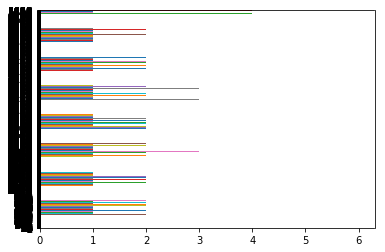

In [108]:
filteredData["Campaign Failures"].plot(kind='barh')

# Pie Chart

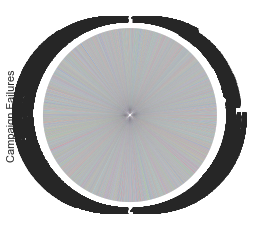

In [88]:
filteredData["Campaign Failures"].plot(kind='pie')

## 1. Remove the column that only contains missing values ([video](https://www.youtube.com/watch?v=TW5RqdDBasg&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=2))

In [9]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

In [10]:
ri.shape

(91741, 14)

In [11]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [12]:
# alternative method
ri.dropna(axis='columns', how='all').shape

(91741, 14)

Lessons:

- Pay attention to default arguments
- Check your work
- There is more than one way to do everything in pandas

## 2. Do men or women speed more often? ([video](https://www.youtube.com/watch?v=d0oBRIONOEw&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=3))

In [13]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [14]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [15]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts(normalize=True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [16]:
# repeat for women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

In [17]:
# combines the two lines above
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

What are some relevant facts that we don't know?

Lessons:

- There is more than one way to understand a question

## 3. Does gender affect who gets searched during a stop? ([video](https://www.youtube.com/watch?v=WzpGq1X5U1M&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=4))

In [18]:
# ignore gender for the moment
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

In [19]:
# how does this work?
ri.search_conducted.mean()

0.03483720473942948

In [20]:
# search rate by gender
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

Does this prove that gender affects who gets searched?

In [21]:
# include a second factor
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

Does this prove causation?

Lessons:

- Causation is difficult to conclude, so focus on relationships
- Include all relevant factors when studying a relationship

## 4. Why is search_type missing so often? ([video](https://www.youtube.com/watch?v=3D6smaE9c-g&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=5))

In [22]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [23]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [24]:
# test that theory, why is the Series empty?
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

In [25]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [26]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Inventory,Protective Frisk                                    11
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Invent

In [27]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

Lessons:

- Verify your assumptions about your data
- pandas functions ignore missing values by default

## 5. During a search, how often is the driver frisked? ([video](https://www.youtube.com/watch?v=4tTO_xH4aQE&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=6))

In [28]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Protective Frisk,Reasonable Suspicion                          11
Incident t

In [29]:
# use bracket notation when creating a column
ri['frisk'] = ri.search_type == 'Protective Frisk'

In [30]:
ri.frisk.dtype

dtype('bool')

In [31]:
# includes exact matches only
ri.frisk.sum()

161

In [32]:
# is this the answer?
ri.frisk.mean()

0.0017549405391264537

In [33]:
# uses the wrong denominator (includes stops that didn't involve a search)
ri.frisk.value_counts()

False    91580
True       161
Name: frisk, dtype: int64

In [34]:
161 / (91580 + 161)

0.0017549405391264537

In [35]:
# includes partial matches
ri['frisk'] = ri.search_type.str.contains('Protective Frisk')

In [36]:
# seems about right
ri.frisk.sum()

274

In [37]:
# frisk rate during a search
ri.frisk.mean()

0.08573216520650813

In [38]:
# str.contains preserved missing values from search_type
ri.frisk.value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [39]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

Lessons:

- Use string methods to find partial matches
- Use the correct denominator when calculating rates
- pandas calculations ignore missing values
- Apply the "smell test" to your results

## 6. Which year had the least number of stops? ([video](https://www.youtube.com/watch?v=W0zGzXQmE7c&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=7))

In [40]:
# this works, but there's a better way
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [41]:
# make sure you create this column
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
ri['stop_datetime'] = pd.to_datetime(combined)

In [42]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

In [43]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

Lessons:

- Consider removing chunks of data that may be biased
- Use the datetime data type for dates and times

## 7. How does drug activity change by time of day? ([video](https://www.youtube.com/watch?v=jV24N7SPXEU&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=8))

In [44]:
ri.drugs_related_stop.dtype

dtype('bool')

In [45]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

In [46]:
# can't groupby 'hour' unless you create it as a column
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

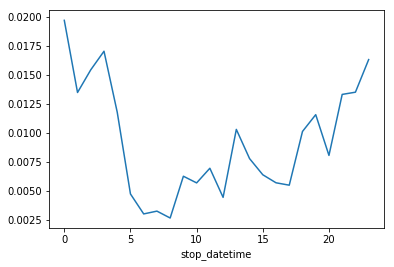

In [47]:
# line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

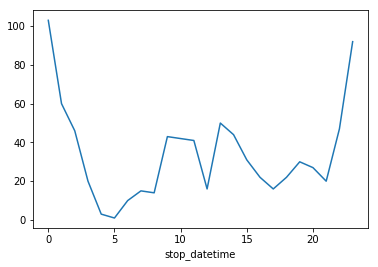

In [48]:
# alternative: count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

Lessons:

- Use plots to help you understand trends
- Create exploratory plots using pandas one-liners

## 8. Do most stops occur at night? ([video](https://www.youtube.com/watch?v=GsQ6x3pt2w4&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=9))

In [49]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

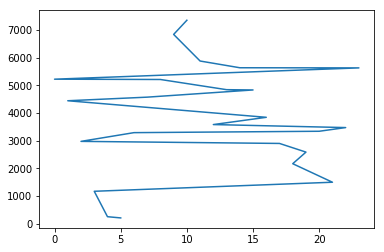

In [50]:
ri.stop_datetime.dt.hour.value_counts().plot()

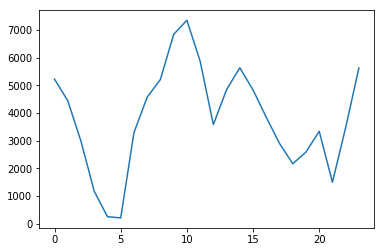

In [51]:
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

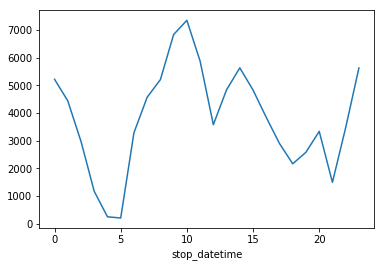

In [52]:
# alternative method
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

Lessons:

- Be conscious of sorting when plotting

## 9. Find the bad data in the stop_duration column and fix it ([video](https://www.youtube.com/watch?v=8U8ob9bXakY&list=PL5-da3qGB5IBITZj_dYSFqnd_15JgqwA6&index=10))

In [53]:
# mark bad data as missing
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [54]:
# what four things are wrong with this code?
# ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

In [55]:
# what two things are still wrong with this code?
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\justm\AppData\Local\conda\conda\envs\pd22.0\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [56]:
# assignment statement did not work
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

In [57]:
# solves SettingWithCopyWarning
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [58]:
# confusing!
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

In [59]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [60]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

In [61]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

Lessons:

- Ambiguous data should be marked as missing
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

## 10. What is the mean stop_duration for each violation_raw?

In [62]:
# make sure you create this column
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [63]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [64]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [65]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


Lessons:

- Convert strings to numbers for analysis
- Approximate when necessary
- Use count with mean to looking for meaningless means

## 11. Plot the results of the first groupby from the previous exercise

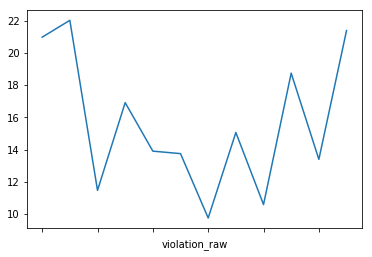

In [66]:
# what's wrong with this?
ri.groupby('violation_raw').stop_minutes.mean().plot()

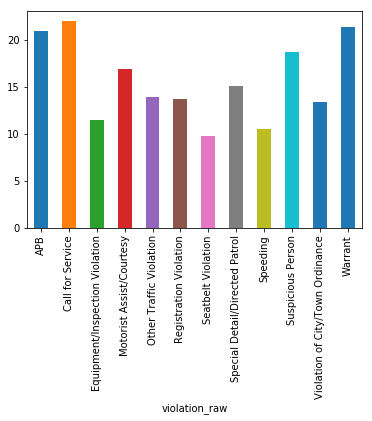

In [67]:
# how could this be made better?
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

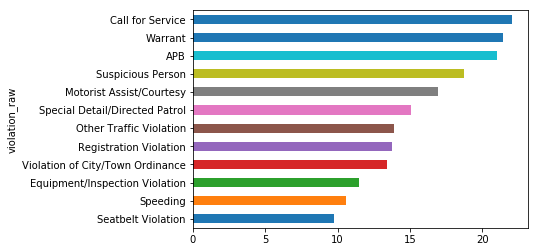

In [68]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

Lessons:

- Don't use a line plot to compare categories
- Be conscious of sorting and orientation when plotting

## 12. Compare the age distributions for each violation

In [69]:
# good first step
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


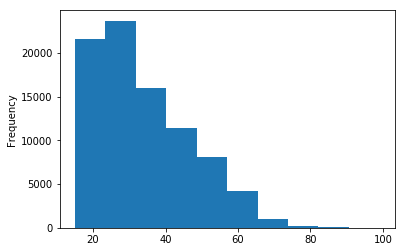

In [70]:
# histograms are excellent for displaying distributions
ri.driver_age.plot(kind='hist')

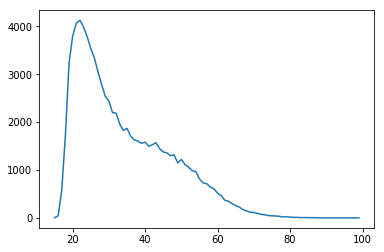

In [71]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612DB9E048>,
      dtype=object)

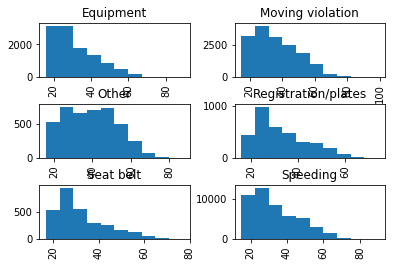

In [72]:
# can't use the plot method
ri.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612E84B208>,
      dtype=object)

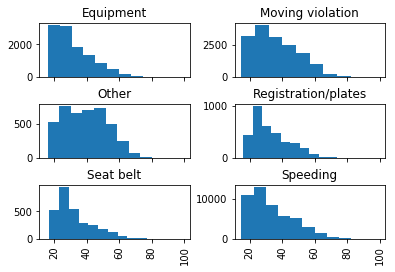

In [73]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612F208160>,
      dtype=object)

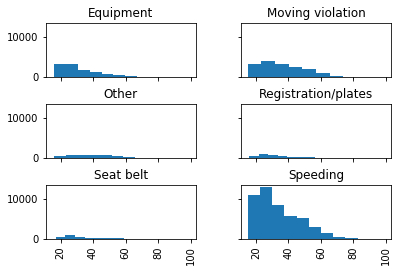

In [74]:
# what changed? how is this better or worse?
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

Lessons:

- Use histograms to show distributions
- Be conscious of axes when using grouped plots

## 13. Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [75]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


In [76]:
# appears to be year of stop_date minus driver_age_raw
ri.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 22:46:00,8.0


In [77]:
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002612F4BD3C8>,
      dtype=object)

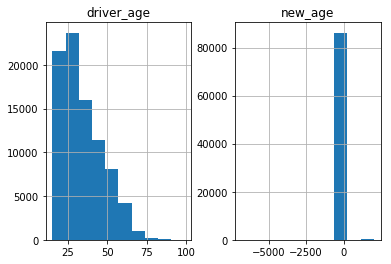

In [78]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()

In [79]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [80]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape

(294, 18)

In [81]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [82]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [83]:
# what does this tell us? researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [84]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [85]:
# set the ages outside that range as missing
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [86]:
ri.new_age.equals(ri.driver_age)

True

Lessons:

- Don't assume that the head and tail are representative of the data
- Columns with missing values may still have bad data (driver_age_raw)
- Data cleaning sometimes involves guessing (driver_age)
- Use histograms for a sanity check